In [20]:
#Loaded the dataset

import pandas as pd
dataset=pd.read_csv("D:\Projects\Churn Prediction\Dataset 1\Telco Customer Churn\WA_Fn-UseC_-Telco-Customer-Churn.csv")
dataset.count



<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
C:\Users\GODWIN\AppData\Local\Temp\ipykernel_8888\2059963364.py:4: SyntaxWarning: invalid escape sequence '\P'
  dataset=pd.read_csv("D:\Projects\Churn Prediction\Dataset 1\Telco Customer Churn\WA_Fn-UseC_-Telco-Customer-Churn.csv")


<bound method DataFrame.count of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL

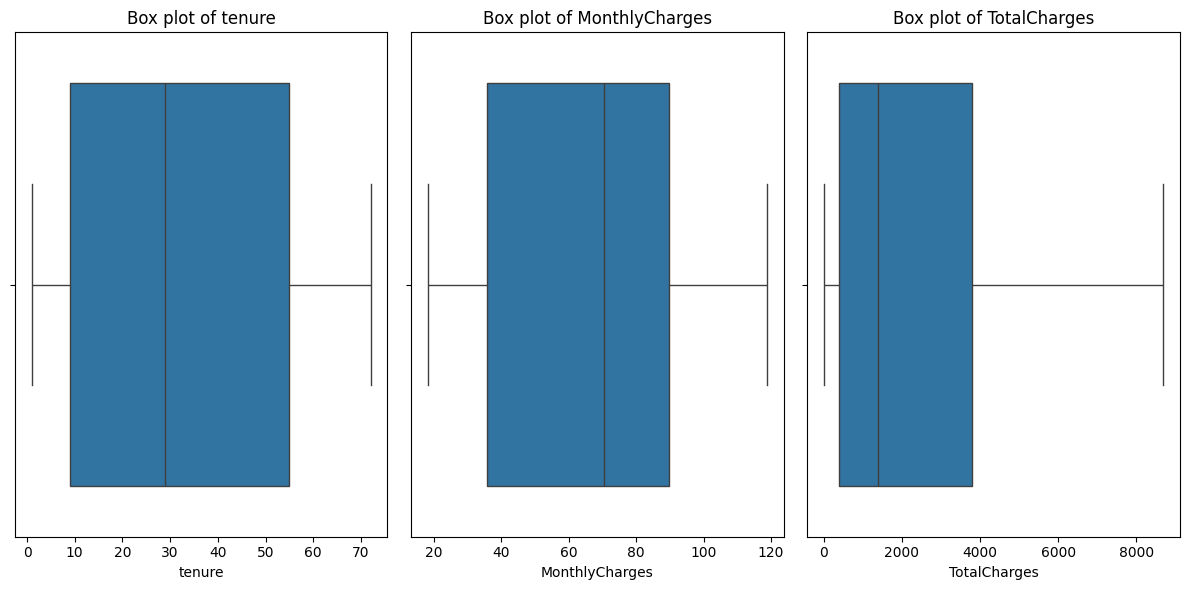

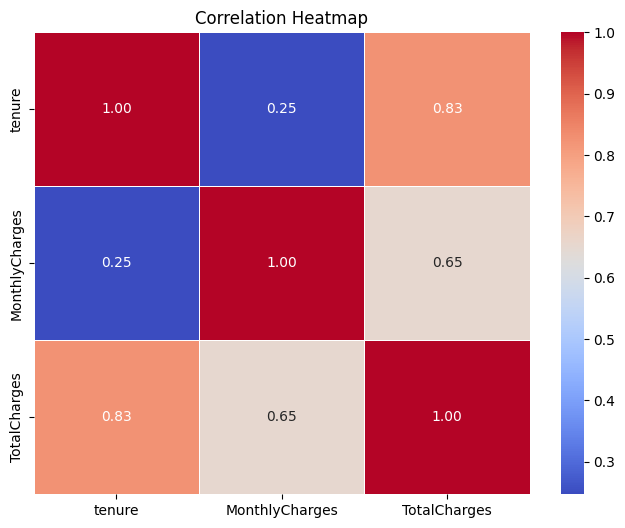

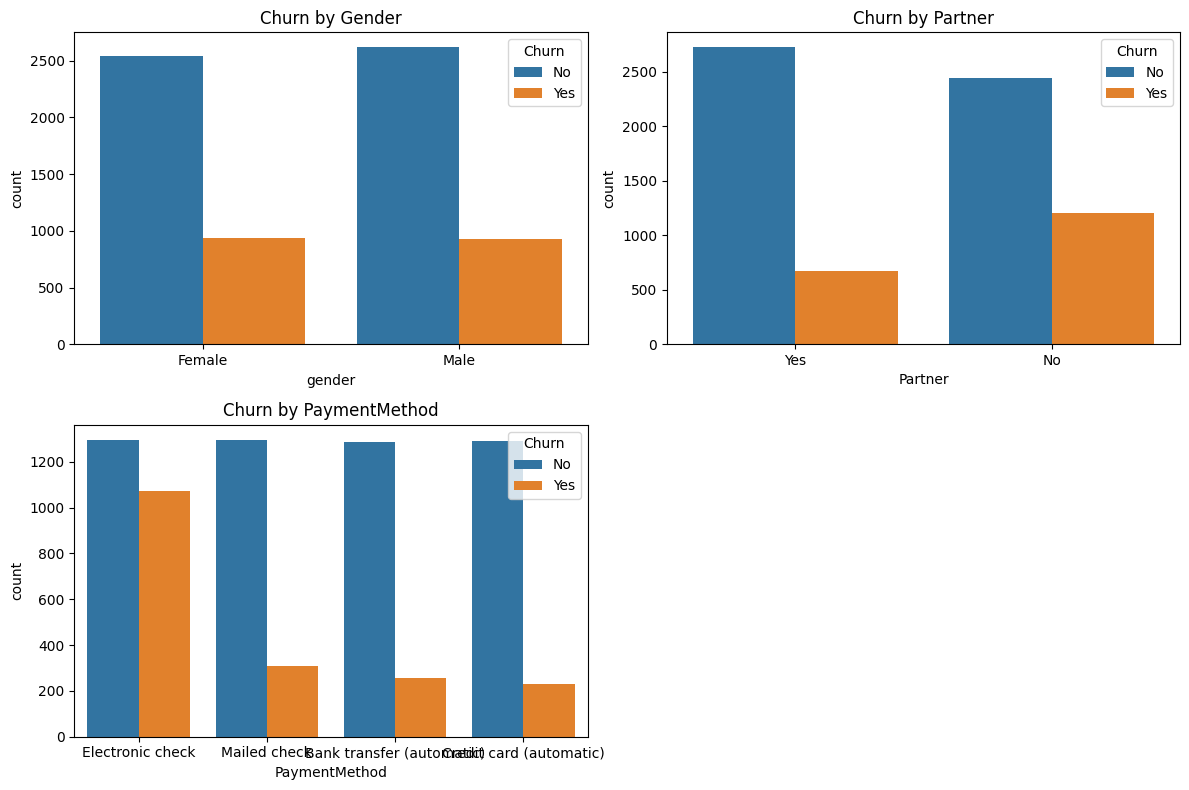

In [21]:
#Exploratory Data Analysis (EDA) process 

#Check for Missing Data
dataset.isnull().sum()
#Therefore, there is no null value
#Check for  Data Type
dataset.dtypes
#Check for duplicate row
dataset.duplicated().sum()
#there is no duplicate
#while running the Descriptive statiscs i came to find out that the column "TotalCharges" is non-numeric column with null value but is actually a numeric column
#How i figured it: 
#That code only gave Descriptive statiscs for only two colums taht how I figured it 
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')
dataset = dataset.dropna(subset=["TotalCharges"]) #11 Null rows
dataset['TotalCharges'].isnull().sum() 
#7043-11=7032 rows
#Descriptive statiscs
dataset[["tenure","MonthlyCharges","TotalCharges"]].describe()
# dataset[["gender", "Contract"]].describe(include='all')
# dataset[["gender","Contract"]].describe()
# dataset[["gender", "Contract"]].describe(include='all')
#Univariate Analysis
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.boxplot(x=dataset["tenure"])
plt.title("Box plot of tenure")
plt.subplot(1,3,2)
sns.boxplot(x=dataset["MonthlyCharges"])
plt.title("Box plot of MonthlyCharges")
plt.subplot(1,3,3)
sns.boxplot(x=dataset["TotalCharges"])
plt.title("Box plot of TotalCharges")
plt.tight_layout() # To avoid overllapping of plots
#plt.savefig("box_plots.png")
#There is no oulier
plt.show()
#Bivariate Analysis
correlation_matrix = dataset[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

# Set up the figure size
plt.figure(figsize=(8, 6))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title and show the plot
plt.title("Correlation Heatmap")
#plt.savefig("Correlation Heatmap.png")
plt.show()
#"tenure" and "totalcharges" are highing a colinearity of 00.83 it might can be removed but im going to use random forest model so it ok to have those features

plt.figure(figsize=(12, 8))

# Bar plot for 'gender' vs 'Churn'
plt.subplot(2, 2, 1)
sns.countplot(data=dataset, x='gender', hue='Churn')  # 'hue' will split the bars by Churn (Yes/No)
plt.title('Churn by Gender')

# Bar plot for 'Partner' vs 'Churn'
plt.subplot(2, 2, 2)
sns.countplot(data=dataset, x='Partner', hue='Churn')
plt.title('Churn by Partner')

# Bar plot for 'PaymentMethod' vs 'Churn'
plt.subplot(2, 2, 3)
sns.countplot(data=dataset, x='PaymentMethod', hue='Churn')
plt.title('Churn by PaymentMethod')

# Adjust layout to prevent overlap
plt.tight_layout()
#plt.savefig("count-plot.png")
# Show the plots
plt.show()










In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Separating features and target
X = dataset.drop(['Churn', 'customerID'], axis=1).copy()
y = dataset['Churn'].copy()

# Encode the target (Churn)
le_target = LabelEncoder()
y = le_target.fit_transform(y)

# Identify categorical and numeric columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numeric_columns = X.select_dtypes(exclude=['object']).columns.tolist()

# Label encode all categorical features for compatibility
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# === Train/test split ===
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === ColumnTransformer with OneHotEncoder ===
column_transformer = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
    ('num', 'passthrough', numeric_columns)
])

# Fit and transform the training data
X_train_transformed = column_transformer.fit_transform(X_train)



In [23]:
#Training the model
# Tried with different models but rf is giving good metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
model=RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,n_estimators=200,random_state=42)
model.fit(X_train,y_train)
y_prediction=model.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_prediction))
print(classification_report(y_test,y_prediction))



0.8017057569296375
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.67      0.49      0.57       374

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [24]:
#Using gridserchcv to find the best hyperparameter for random forest model

# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']  
# }

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)


In [25]:
#Saving the model or creating pickle file
import pickle
with open('rf.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)
with open('column_encoder.pkl', 'wb') as f:
    pickle.dump(column_transformer,f)

In [26]:
print(X_train.shape, y_train.shape)


(5625, 19) (5625,)
